In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('scaled_smoking_drinking_dataset.csv')

In [3]:
df.head()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,...,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,sex,urine_protein,hear_left,hear_right,DRK_YN,SMK_stat_type_cd
0,-0.889514,0.835874,0.936210,0.739781,0.031629,0.035668,-0.167261,0.399153,-0.058910,-0.066141,...,0.290374,-0.212371,0.351404,0.056791,0,1.0,1.0,1.0,1,0.0
1,-1.242090,1.913117,1.335755,0.655395,-0.133401,0.366370,0.520349,0.601391,0.230586,0.839184,...,0.082270,-0.254936,0.389415,-0.201022,0,1.0,1.0,1.0,0,1.0
2,-0.536938,0.297252,0.936210,0.824167,0.361690,0.862423,-0.167261,-0.612034,-0.100267,-1.540528,...,0.082270,0.894324,0.237373,0.612081,0,1.0,1.0,1.0,0,0.0
3,0.168215,1.374495,1.335755,0.824167,0.856782,0.366370,1.551763,1.106985,-0.224337,0.140790,...,0.498477,0.128151,0.313394,-0.379508,0,1.0,1.0,1.0,0,0.0
4,0.168215,0.297252,-0.262425,-0.104078,0.031629,0.366370,1.070436,0.601391,0.023803,0.089058,...,-0.125833,-0.297501,-0.522835,-0.240685,0,1.0,1.0,1.0,0,0.0


# Multi-label Classification using Feed-Forward

In [4]:
X = df[df.columns[~df.columns.isin(['DRK_YN', 'SMK_stat_type_cd'])]]
y = df[['DRK_YN', 'SMK_stat_type_cd']]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

In [6]:
X_train_act, X_train_val, y_train_act, y_train_val = train_test_split(X_train, y_train, random_state=17)

In [7]:
X_train.shape

(743509, 22)

In [8]:
def build_ffnn_model():
    ffnn_model = tf.keras.Sequential([
      tf.keras.Input(shape=(X.shape[1],)),
      tf.keras.layers.Dense(22, activation=tf.nn.relu),
      tf.keras.layers.Dense(12, activation=tf.nn.relu),
      tf.keras.layers.Dense(2, activation=tf.nn.sigmoid)
    ])

    return ffnn_model

In [9]:
model = build_ffnn_model()

In [10]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808 (3.16 KB)

 Trainable params: 808 (3.16 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
def run_network(data, model, epochs=20, batch=128):
    X_train, y_train, X_val, y_val = data
    print("Training model")
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch,
                        validation_data=(X_val, y_val), verbose=2)
    return history

In [13]:
history = run_network([X_train_act, y_train_act, X_train_val, y_train_val], model)

Training model
Epoch 1/20
4357/4357 - 2s - 510us/step - accuracy: 0.9435 - loss: 0.4738 - val_accuracy: 0.9398 - val_loss: 0.4630
Epoch 2/20
4357/4357 - 2s - 461us/step - accuracy: 0.9415 - loss: 0.4602 - val_accuracy: 0.9374 - val_loss: 0.4587
Epoch 3/20
4357/4357 - 2s - 474us/step - accuracy: 0.9390 - loss: 0.4578 - val_accuracy: 0.9342 - val_loss: 0.4572
Epoch 4/20
4357/4357 - 2s - 459us/step - accuracy: 0.9377 - loss: 0.4567 - val_accuracy: 0.9374 - val_loss: 0.4566
Epoch 5/20
4357/4357 - 2s - 442us/step - accuracy: 0.9363 - loss: 0.4559 - val_accuracy: 0.9365 - val_loss: 0.4564
Epoch 6/20
4357/4357 - 2s - 405us/step - accuracy: 0.9360 - loss: 0.4555 - val_accuracy: 0.9357 - val_loss: 0.4568
Epoch 7/20
4357/4357 - 2s - 406us/step - accuracy: 0.9360 - loss: 0.4551 - val_accuracy: 0.9358 - val_loss: 0.4555
Epoch 8/20
4357/4357 - 2s - 434us/step - accuracy: 0.9359 - loss: 0.4547 - val_accuracy: 0.9378 - val_loss: 0.4551
Epoch 9/20
4357/4357 - 2s - 427us/step - accuracy: 0.9359 - loss:

In [14]:
def eval_network(data, model, batch=16):
    X_test, y_test = data
    score = model.evaluate(X_test, y_test, batch_size=batch)
    return score

In [15]:
score = eval_network([X_test, y_test], model)

15490/15490 ━━━━━━━━━━━━━━━━━━━━ 4s 253us/step - accuracy: 0.9401 - loss: 0.4541


In [16]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [17]:
y_prob = model.predict(X_test)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 239us/step


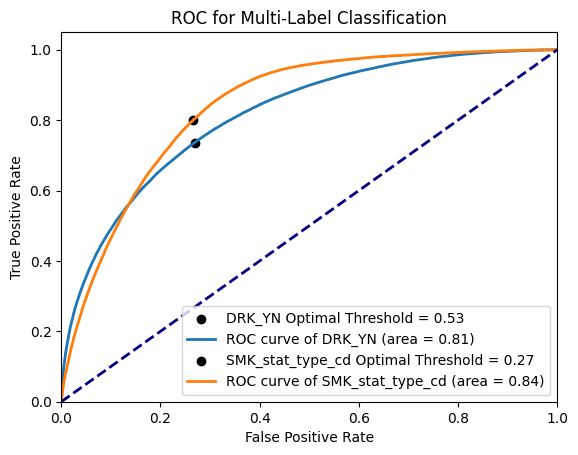

In [18]:
for col,i in zip(['DRK_YN', 'SMK_stat_type_cd'],range(y_prob.shape[1])):  # Assuming y_scores.shape[1] == number of labels
    fpr, tpr, thresholds = roc_curve(y_test[col], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
    optimal_threshold = thresholds[optimal_idx]
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='%s Optimal Threshold = %0.2f' % (col, optimal_threshold))
    plt.plot(fpr, tpr, lw=2, label='ROC curve of %s (area = %0.2f)' % (col, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-Label Classification')
plt.legend(loc="lower right")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [20]:
y_pred = model.predict(X_test)
y_pred = [[1 if x[0] > 0.51 else 0, 1 if x[1] > 0.25 else 0] for x in y_pred]

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 226us/step


In [21]:
ml_acc = accuracy_score(y_test['DRK_YN'], [x[0] for x in y_pred])
ml_acc

0.7334336680963698

In [22]:
ml_acc = accuracy_score(y_test['SMK_stat_type_cd'], [x[1] for x in y_pred])
ml_acc

0.7374282290376336

In [23]:
precision = precision_score(y_test, y_pred, average='samples')
precision

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.33584371986426564

In [24]:
recall = recall_score(y_test, y_pred, average='samples')
recall

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.41389098480049386

In [25]:
f1 = f1_score(y_test, y_pred_binary, average='samples')
f1

NameError: name 'y_pred_binary' is not defined

In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.8274492355465428

# Single-Label Classification using Feed-Forward

In [ ]:
X_smk = df[df.columns[~df.columns.isin(['SMK_stat_type_cd'])]]
y_smk = df['SMK_stat_type_cd']
X_drk = df[df.columns[~df.columns.isin(['DRK_YN'])]]
y_drk = df['DRK_YN']

In [ ]:
X_train_smk, X_test_smk, y_train_smk, y_test_smk = train_test_split(X_smk, y_smk, random_state=6)
X_train_act_smk, X_train_val_smk, y_train_act_smk, y_train_val_smk = train_test_split(X_train_smk, y_train_smk, random_state=124)

In [ ]:
X_train_drk, X_test_drk, y_train_drk, y_test_drk = train_test_split(X_drk, y_drk, random_state=2)
X_train_act_drk, X_train_val_drk, y_train_act_drk, y_train_val_drk = train_test_split(X_train_drk, y_train_drk, random_state=31)

In [ ]:
def build_ff_single_model():
    ffnn_model = tf.keras.Sequential([
      tf.keras.Input(shape=(X_smk.shape[1],)),
      tf.keras.layers.Dense(23, activation=tf.nn.relu),
      tf.keras.layers.Dense(12, activation=tf.nn.relu),
      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
    ])

    return ffnn_model

### Smoker Classifier

In [ ]:
model_smk = build_ff_single_model()

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_smk.compile(loss='crossentropy', optimizer=sgd, metrics=['accuracy'])
model_smk.summary()

Model: "sequential_46"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_193 (Dense)               │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_194 (Dense)               │ (None, 12)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_195 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 853 (3.33 KB)

 Trainable params: 853 (3.33 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_smk = run_network([X_train_act_smk, y_train_act_smk, X_train_val_smk, y_train_val_smk], model_smk)

Training model
Epoch 1/20
4357/4357 - 2s - 534us/step - accuracy: 0.8026 - loss: 0.3918 - val_accuracy: 0.8066 - val_loss: 0.3860
Epoch 2/20
4357/4357 - 2s - 480us/step - accuracy: 0.8093 - loss: 0.3816 - val_accuracy: 0.8102 - val_loss: 0.3829
Epoch 3/20
4357/4357 - 2s - 459us/step - accuracy: 0.8102 - loss: 0.3800 - val_accuracy: 0.8113 - val_loss: 0.3816
Epoch 4/20
4357/4357 - 2s - 404us/step - accuracy: 0.8110 - loss: 0.3791 - val_accuracy: 0.8100 - val_loss: 0.3823
Epoch 5/20
4357/4357 - 2s - 432us/step - accuracy: 0.8116 - loss: 0.3785 - val_accuracy: 0.8114 - val_loss: 0.3812
Epoch 6/20
4357/4357 - 2s - 422us/step - accuracy: 0.8119 - loss: 0.3782 - val_accuracy: 0.8116 - val_loss: 0.3806
Epoch 7/20
4357/4357 - 2s - 409us/step - accuracy: 0.8123 - loss: 0.3776 - val_accuracy: 0.8109 - val_loss: 0.3810
Epoch 8/20
4357/4357 - 2s - 405us/step - accuracy: 0.8121 - loss: 0.3775 - val_accuracy: 0.8120 - val_loss: 0.3802
Epoch 9/20
4357/4357 - 2s - 411us/step - accuracy: 0.8121 - loss:

In [ ]:
score_smk = eval_network([X_test_smk, y_test_smk], model_smk)

15490/15490 ━━━━━━━━━━━━━━━━━━━━ 4s 253us/step - accuracy: 0.8145 - loss: 0.3771


In [ ]:
y_prob = model_smk.predict(X_test_smk)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 223us/step


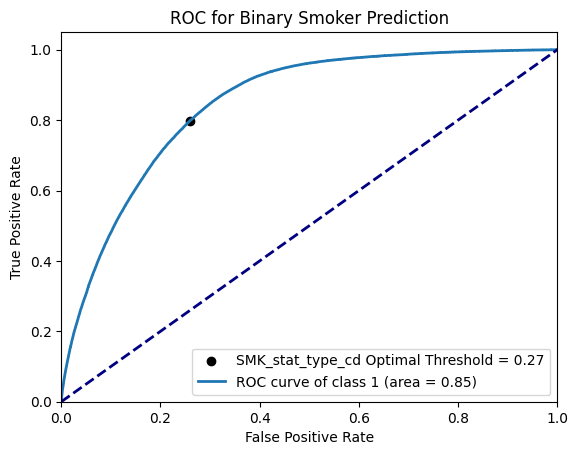

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_smk, y_prob)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='%s Optimal Threshold = %0.2f' % (col, optimal_threshold))
plt.plot(fpr, tpr, lw=2, label='ROC curve of class %d (area = %0.2f)' % (i, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Binary Smoker Prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = model_smk.predict(X_test_smk)
threshold = 0.27
y_pred = (y_pred > threshold).astype(int)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 247us/step


In [ ]:
acc_smk = accuracy_score(y_test_smk, y_pred)
acc_smk

0.7512599006605147

### Drinker Classifier

In [ ]:
model_drk = build_ff_single_model()

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_drk.compile(loss='crossentropy', optimizer=sgd, metrics=['accuracy'])
model_drk.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_208 (Dense)               │ (None, 23)             │           552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_209 (Dense)               │ (None, 12)             │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_210 (Dense)               │ (None, 1)              │            13 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 853 (3.33 KB)

 Trainable params: 853 (3.33 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_drk = run_network([X_train_act_drk, y_train_act_drk, X_train_val_drk, y_train_val_drk], model_drk)

Training model
Epoch 1/20
4357/4357 - 2s - 514us/step - accuracy: 0.7244 - loss: 0.5379 - val_accuracy: 0.7287 - val_loss: 0.5300
Epoch 2/20
4357/4357 - 2s - 448us/step - accuracy: 0.7321 - loss: 0.5260 - val_accuracy: 0.7315 - val_loss: 0.5250
Epoch 3/20
4357/4357 - 2s - 408us/step - accuracy: 0.7334 - loss: 0.5239 - val_accuracy: 0.7327 - val_loss: 0.5234
Epoch 4/20
4357/4357 - 2s - 428us/step - accuracy: 0.7343 - loss: 0.5229 - val_accuracy: 0.7329 - val_loss: 0.5230
Epoch 5/20
4357/4357 - 2s - 453us/step - accuracy: 0.7350 - loss: 0.5221 - val_accuracy: 0.7329 - val_loss: 0.5222
Epoch 6/20
4357/4357 - 2s - 425us/step - accuracy: 0.7350 - loss: 0.5216 - val_accuracy: 0.7334 - val_loss: 0.5222
Epoch 7/20
4357/4357 - 2s - 428us/step - accuracy: 0.7353 - loss: 0.5213 - val_accuracy: 0.7335 - val_loss: 0.5224
Epoch 8/20
4357/4357 - 2s - 410us/step - accuracy: 0.7353 - loss: 0.5210 - val_accuracy: 0.7334 - val_loss: 0.5227
Epoch 9/20
4357/4357 - 2s - 441us/step - accuracy: 0.7355 - loss:

In [ ]:
y_prob = model_drk.predict(X_test_drk)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 220us/step


In [ ]:
score_drk = eval_network([X_test_drk, y_test_drk], model_drk)

15490/15490 ━━━━━━━━━━━━━━━━━━━━ 4s 255us/step - accuracy: 0.7351 - loss: 0.5214


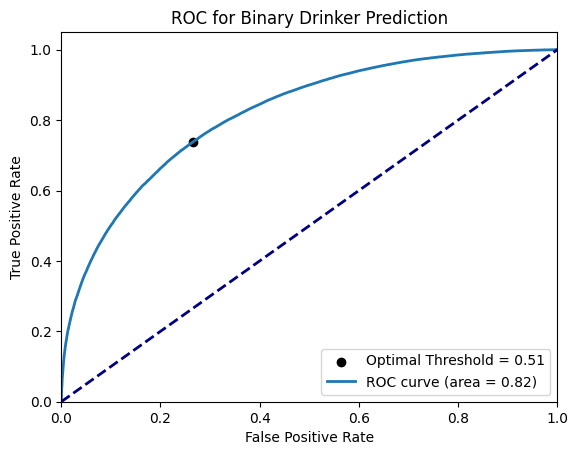

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_drk, y_prob)
roc_auc = auc(fpr, tpr)
optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
optimal_threshold = thresholds[optimal_idx]
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='Optimal Threshold = %0.2f' % optimal_threshold)
plt.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Binary Drinker Prediction')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = model_drk.predict(X_test_drk)
threshold = 0.51
y_pred = (y_pred > threshold).astype(int)

7745/7745 ━━━━━━━━━━━━━━━━━━━━ 2s 218us/step


In [ ]:
acc_drk = accuracy_score(y_test_drk, y_pred)
acc_drk

0.7362581051255462

# Below 50 Multi-Label

In [ ]:
below50_df = pd.read_csv('scaled_smoking_drinking_dataset_50_and_under.csv')

In [ ]:
X_below = below50_df[below50_df.columns[~below50_df.columns.isin(['DRK_YN', 'SMK_stat_type_cd'])]]
y_below = below50_df[['DRK_YN', 'SMK_stat_type_cd']]

In [ ]:
X_train_below, X_test_below, y_train_below, y_test_below = train_test_split(X_below, y_below, random_state=3)

In [ ]:
X_train_below_act, X_train_below_val, y_train_below_act, y_train_below_val = train_test_split(X_train_below, y_train_below, random_state=17)

In [ ]:
X_train_below.shape

(470130, 22)

In [ ]:
model_below = build_ffnn_model()

In [ ]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model_below.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [ ]:
model_below.summary()

Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_211 (Dense)               │ (None, 22)             │           506 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_212 (Dense)               │ (None, 12)             │           276 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_213 (Dense)               │ (None, 2)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 808 (3.16 KB)

 Trainable params: 808 (3.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = run_network([X_train_below_act, y_train_below_act, X_train_below_val, y_train_below_val], model_below)

Training model
Epoch 1/20
2755/2755 - 2s - 606us/step - accuracy: 0.9413 - loss: 0.5227 - val_accuracy: 0.9403 - val_loss: 0.5064
Epoch 2/20
2755/2755 - 1s - 430us/step - accuracy: 0.9398 - loss: 0.5063 - val_accuracy: 0.9371 - val_loss: 0.5036
Epoch 3/20
2755/2755 - 1s - 411us/step - accuracy: 0.9388 - loss: 0.5037 - val_accuracy: 0.9318 - val_loss: 0.5022
Epoch 4/20
2755/2755 - 1s - 413us/step - accuracy: 0.9377 - loss: 0.5021 - val_accuracy: 0.9402 - val_loss: 0.5005
Epoch 5/20
2755/2755 - 1s - 408us/step - accuracy: 0.9373 - loss: 0.5012 - val_accuracy: 0.9302 - val_loss: 0.5027
Epoch 6/20
2755/2755 - 1s - 418us/step - accuracy: 0.9362 - loss: 0.5005 - val_accuracy: 0.9373 - val_loss: 0.4988
Epoch 7/20
2755/2755 - 1s - 424us/step - accuracy: 0.9362 - loss: 0.4999 - val_accuracy: 0.9363 - val_loss: 0.4983
Epoch 8/20
2755/2755 - 1s - 408us/step - accuracy: 0.9361 - loss: 0.4996 - val_accuracy: 0.9382 - val_loss: 0.4978
Epoch 9/20
2755/2755 - 1s - 414us/step - accuracy: 0.9356 - loss:

In [ ]:
score = eval_network([X_test_below, y_test_below], model_below)

9795/9795 ━━━━━━━━━━━━━━━━━━━━ 3s 263us/step - accuracy: 0.9308 - loss: 0.5007


In [ ]:
y_prob = model_below.predict(X_test_below)

4898/4898 ━━━━━━━━━━━━━━━━━━━━ 1s 237us/step


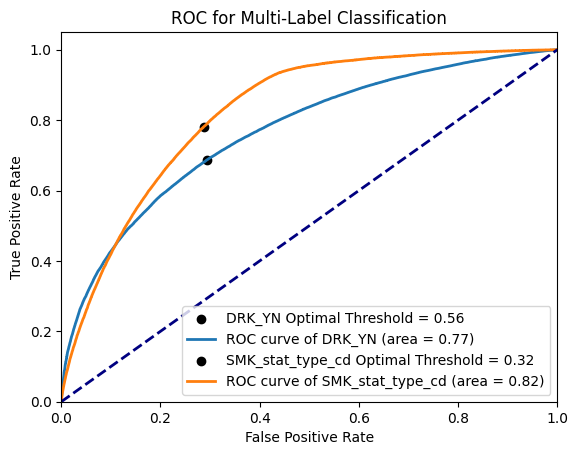

In [ ]:
for col,i in zip(['DRK_YN', 'SMK_stat_type_cd'],range(y_prob.shape[1])):  # Assuming y_scores.shape[1] == number of labels
    fpr, tpr, thresholds = roc_curve(y_test_below[col], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    optimal_idx = np.argmin(np.sqrt((1-tpr)**2 + fpr**2))
    optimal_threshold = thresholds[optimal_idx]
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='black', label='%s Optimal Threshold = %0.2f' % (col, optimal_threshold))
    plt.plot(fpr, tpr, lw=2, label='ROC curve of %s (area = %0.2f)' % (col, roc_auc))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Multi-Label Classification')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = model_below.predict(X_test_below)
y_pred = [[1 if x[0] > 0.56 else 0, 1 if x[1] > 0.32 else 0] for x in y_pred]

4898/4898 ━━━━━━━━━━━━━━━━━━━━ 1s 241us/step


In [ ]:
ml_acc = accuracy_score(y_test_below['SMK_stat_type_cd'], [x[1] for x in y_pred])
ml_acc

0.730133813197542

In [ ]:
ml_acc = accuracy_score(y_test_below['DRK_YN'], [x[0] for x in y_pred])
ml_acc

0.6937419836514348

# One-Class Smoker-Drinker

In [ ]:
df = pd.read_csv('scaled_smoking_drinking_dataset.csv')

In [ ]:
df['Smoker-Drinker'] = [0 if df['DRK_YN'] == 1]

In [ ]:
df.head()

,age,height,weight,waistline,sight_left,sight_right,SBP,DBP,BLDS,tot_chole,...,SGOT_AST,SGOT_ALT,gamma_GTP,sex,urine_protein,hear_left,hear_right,DRK_YN,SMK_stat_type_cd,Smoker-Drinker
0,-0.889514,0.835874,0.936210,0.739781,0.031629,0.035668,-0.167261,0.399153,-0.058910,-0.066141,...,-0.212371,0.351404,0.056791,0,1.0,1.0,1.0,1,0.0,1.0
1,-1.242090,1.913117,1.335755,0.655395,-0.133401,0.366370,0.520349,0.601391,0.230586,0.839184,...,-0.254936,0.389415,-0.201022,0,1.0,1.0,1.0,0,1.0,1.0
2,-0.536938,0.297252,0.936210,0.824167,0.361690,0.862423,-0.167261,-0.612034,-0.100267,-1.540528,...,0.894324,0.237373,0.612081,0,1.0,1.0,1.0,0,0.0,0.0
3,0.168215,1.374495,1.335755,0.824167,0.856782,0.366370,1.551763,1.106985,-0.224337,0.140790,...,0.128151,0.313394,-0.379508,0,1.0,1.0,1.0,0,0.0,0.0
4,0.168215,0.297252,-0.262425,-0.104078,0.031629,0.366370,1.070436,0.601391,0.023803,0.089058,...,-0.297501,-0.522835,-0.240685,0,1.0,1.0,1.0,0,0.0,0.0
